In [60]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns 
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans 

df = pd.read_csv("Dataset//Attrition.csv")

In [54]:
pd.factorize(df['Attrition'])

for column in df.columns: 
    if not is_numeric_dtype(df[column]): 
        item = df[column] 
        unique = list(df[column].unique()) 
        mapping = dict(zip(unique, range(0, len(unique) + 1))) 
        df[column] = item.map(mapping).astype(int)

df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,52.000000,0,0,593,0,9,4,0,2,...,3.0,3,0,20,2.0,2,8.0,7,2,13
1,1,36.000000,0,0,1218,0,1,1,1,2,...,3.0,3,1,21,3.0,3,1.0,8,1,6
2,2,35.906122,0,1,530,1,16,3,1,3,...,3.0,3,1,7,4.0,3,1.0,5,1,2
3,3,33.000000,0,0,953,0,5,4,2,2,...,3.0,2,0,12,1.0,3,3.0,7,0,7
4,4,37.252033,0,0,1380,0,9,2,1,3,...,3.0,3,0,2,2.0,3,10.0,2,2,1


In [58]:
item = df['Attrition'] 
unique = list(df['Attrition'].unique()) 
mapping = dict(zip(unique, range(0, len(unique) + 1))) 
print(item)

0       0
1       0
2       0
3       0
4       0
       ..
1171    0
1172    1
1173    0
1174    0
1175    0
Name: Attrition, Length: 1176, dtype: int32


In [16]:
#Executing kmeans on Train dataset, saving sse values on sse_values list
sse_values = list() 
max_k = 30
for k in range(2, max_k + 1): 
    kmeans = KMeans(init='k-means++', n_clusters = k, max_iter = 100)
    kmeans.fit(df._get_numeric_data())
    sse_values.append(kmeans.inertia_)

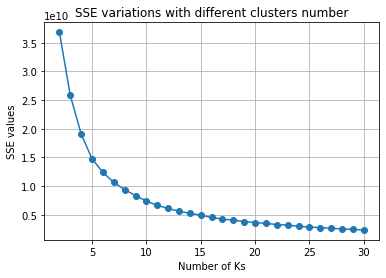

In [20]:
plt.plot(range(2, max_k + 1), sse_values, marker = "o")
plt.grid(True)
plt.title("SSE variations with different clusters number")
plt.xlabel("Number of Ks")
plt.ylabel("SSE values")
plt.show()

In [1]:
###DBSCAN - NEW

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
#from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, RobustScaler

In [17]:
to_push = ['Age', 'DistanceFromHome','Education','EnvironmentSatisfaction',
           'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome',
           'NumCompaniesWorked','RelationshipSatisfaction','TotalWorkingYears',
           'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole',
           'YearsSinceLastPromotion','YearsWithCurrManager'] 

to_push_2 = ['Age', 'DistanceFromHome','Education','JobLevel','MonthlyIncome',
             'NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
             'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'] 

subset_3 = ['Age', 'DistanceFromHome','Education','JobLevel','MonthlyIncome',
             'NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
             'YearsMean'] 

to_push_4 = ['Age', 'DistanceFromHome','MonthlyIncome','NumCompaniesWorked',
             'TotalWorkingYears','YearsAtCompany'] 

to_push_5 = ['Age', 'DistanceFromHome','Education','JobLevel',
             'NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
             'YearsMean'] 

subset_6 = ['HourlyRate','DailyRate','MonthlyRate','DistanceFromHome',
            'MonthlyIncome','TotalWorkingYears','Age','YearsAtCompany']

df = pd.read_csv("./Dataset/attrition.csv")
dfx=df[subset_6]

X = StandardScaler().fit_transform(dfx.values)
scaled_df = pd.DataFrame( X, columns = dfx.columns )

In [18]:
eps_to_test = [round(eps,1) for eps in np.arange(0.1, 2.5, 0.1)]
min_samples_to_test = range(5, 15, 1)

print("EPS:", eps_to_test)
print("MIN_SAMPLES:", list(min_samples_to_test))

EPS: [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4]
MIN_SAMPLES: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [19]:
def get_metrics(eps, min_samples, dataset, iter_):
    
    # Fitting    
    dbscan_model_ = DBSCAN( eps = eps, min_samples = min_samples)
    dbscan_model_.fit(dataset)
    
    # Mean Noise Point Distance metric 
    noise_indices = dbscan_model_.labels_ == -1
    
    if True in noise_indices:
        neighboors = NearestNeighbors(n_neighbors = 6).fit(dataset)
        distances, indices = neighboors.kneighbors(dataset)
        noise_distances = distances[noise_indices, 1:]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None
        
    # Number of found Clusters metric 
    number_of_clusters = len(set(dbscan_model_.labels_[dbscan_model_.labels_ >= 0]))
    
    # Log     
    print("%3d | Tested with eps = %3s and min_samples = %3s | %5s %4s" % (iter_, eps, min_samples, str(noise_mean_distance), number_of_clusters))
        
    return(noise_mean_distance, number_of_clusters)

In [20]:
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

In [21]:
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = get_metrics(eps, min_samples, scaled_df, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

ITER| INFO                                        |  DIST    CLUS
-----------------------------------------------------------------
  1 | Tested with eps = 0.1 and min_samples =   5 | 1.398    0
  2 | Tested with eps = 0.1 and min_samples =   6 | 1.398    0
  3 | Tested with eps = 0.1 and min_samples =   7 | 1.398    0
  4 | Tested with eps = 0.1 and min_samples =   8 | 1.398    0
  5 | Tested with eps = 0.1 and min_samples =   9 | 1.398    0
  6 | Tested with eps = 0.1 and min_samples =  10 | 1.398    0
  7 | Tested with eps = 0.1 and min_samples =  11 | 1.398    0
  8 | Tested with eps = 0.1 and min_samples =  12 | 1.398    0
  9 | Tested with eps = 0.1 and min_samples =  13 | 1.398    0
 10 | Tested with eps = 0.1 and min_samples =  14 | 1.398    0
 11 | Tested with eps = 0.2 and min_samples =   5 | 1.398    0
 12 | Tested with eps = 0.2 and min_samples =   6 | 1.398    0
 13 | Tested with eps = 0.2 and min_samples =   7 | 1.398    0
 14 | Tested with eps = 0.2 and min_samples =   8

129 | Tested with eps = 1.3 and min_samples =  13 | 1.547    1
130 | Tested with eps = 1.3 and min_samples =  14 | 1.535    1
131 | Tested with eps = 1.4 and min_samples =   5 | 1.764    3
132 | Tested with eps = 1.4 and min_samples =   6 | 1.743    2
133 | Tested with eps = 1.4 and min_samples =   7 | 1.728    3
134 | Tested with eps = 1.4 and min_samples =   8 | 1.695    1
135 | Tested with eps = 1.4 and min_samples =   9 | 1.676    1
136 | Tested with eps = 1.4 and min_samples =  10 | 1.666    1
137 | Tested with eps = 1.4 and min_samples =  11 | 1.654    1
138 | Tested with eps = 1.4 and min_samples =  12 | 1.645    1
139 | Tested with eps = 1.4 and min_samples =  13 | 1.635    1
140 | Tested with eps = 1.4 and min_samples =  14 | 1.627    1
141 | Tested with eps = 1.5 and min_samples =   5 | 1.849    5
142 | Tested with eps = 1.5 and min_samples =   6 | 1.816    3
143 | Tested with eps = 1.5 and min_samples =   7 |   1.8    4
144 | Tested with eps = 1.5 and min_samples =   8 | 1.7

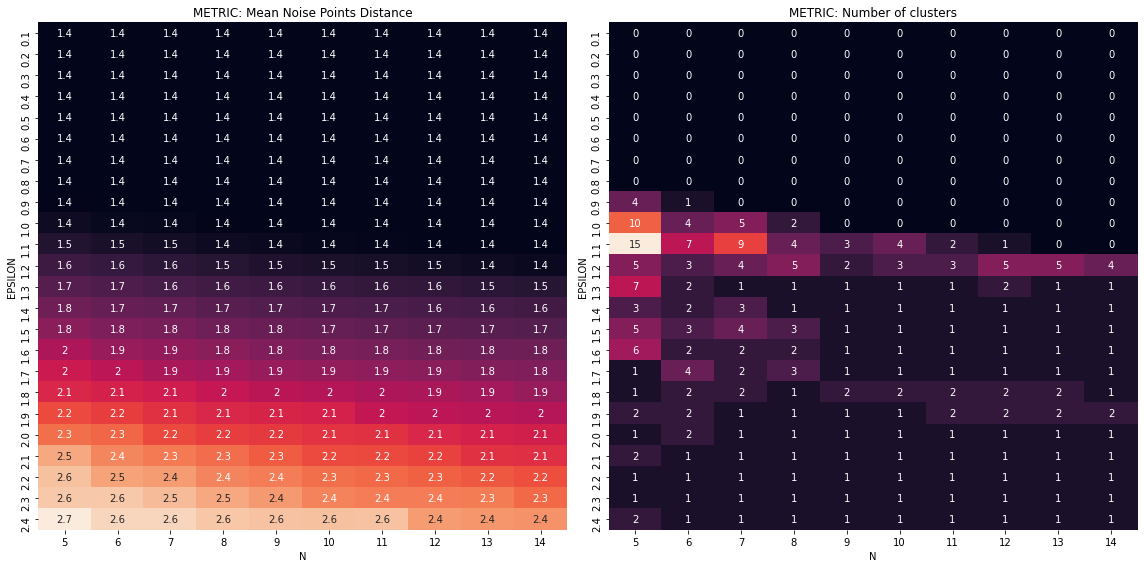

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sns.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sns.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()

In [24]:


for m in np.arange(8,12,1):
    for k in np.arange(1.5,2.3,0.1):

        # Istantiating with eps = 1 and min_samples = 9 
        best_dbscan_model = DBSCAN( eps = k, min_samples = m)

        # Fitting
        best_dbscan_model.fit(scaled_df)

        # Balance
        print(f"eps:{k} min:{m}")
        print(np.unique(best_dbscan_model.labels_,return_counts=True))
        print("\n")


eps:1.5 min:8
(array([-1,  0,  1,  2]), array([421, 746,   5,   4]))


eps:1.6 min:8
(array([-1,  0,  1]), array([318, 854,   4]))


eps:1.7000000000000002 min:8
(array([-1,  0,  1,  2]), array([234, 926,   8,   8]))


eps:1.8000000000000003 min:8
(array([-1,  0]), array([ 166, 1010]))


eps:1.9000000000000004 min:8
(array([-1,  0]), array([ 122, 1054]))


eps:2.0000000000000004 min:8
(array([-1,  0]), array([  82, 1094]))


eps:2.1000000000000005 min:8
(array([-1,  0]), array([  55, 1121]))


eps:2.2000000000000006 min:8
(array([-1,  0]), array([  38, 1138]))


eps:1.5 min:9
(array([-1,  0]), array([442, 734]))


eps:1.6 min:9
(array([-1,  0]), array([345, 831]))


eps:1.7000000000000002 min:9
(array([-1,  0]), array([261, 915]))


eps:1.8000000000000003 min:9
(array([-1,  0,  1]), array([183, 977,  16]))


eps:1.9000000000000004 min:9
(array([-1,  0]), array([ 128, 1048]))


eps:2.0000000000000004 min:9
(array([-1,  0]), array([  88, 1088]))


eps:2.1000000000000005 min:9
(array([-1,

In [26]:

# Istantiating with eps = 1.8 and min_samples = 11
best_dbscan_model = DBSCAN( eps = 1.8, min_samples = 11)

# Fitting
best_dbscan_model.fit(scaled_df)

# Balance
print(np.unique(best_dbscan_model.labels_,return_counts=True))
print("\n")


(array([-1,  0,  1]), array([209, 954,  13]))




<ipython-input-27-3e6da9b44bd5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx["LABEL"] = best_dbscan_model.labels_


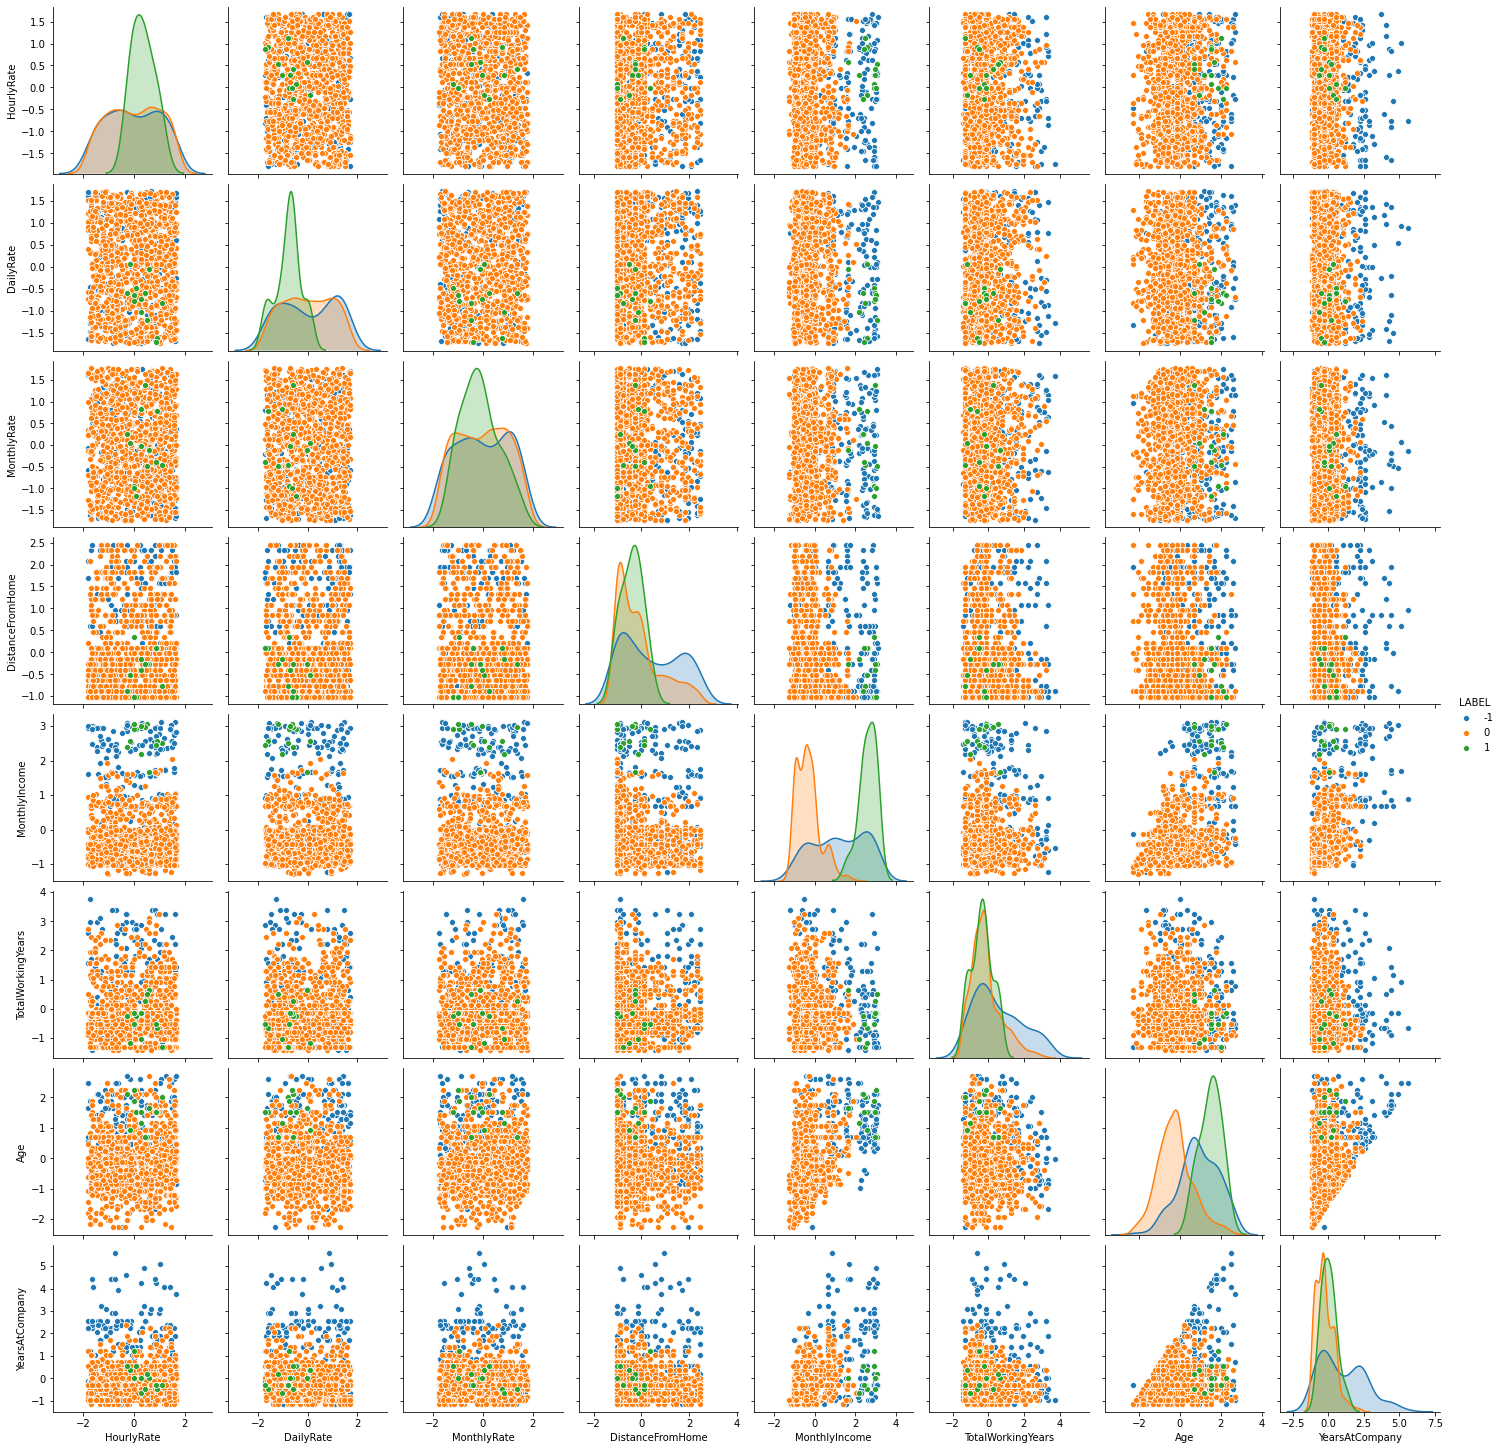

In [27]:
# Extracting labels
scaled_df["LABEL"] = best_dbscan_model.labels_
dfx["LABEL"] = best_dbscan_model.labels_


# Pairplot
sns.pairplot( scaled_df, hue = "LABEL" ); plt.show()



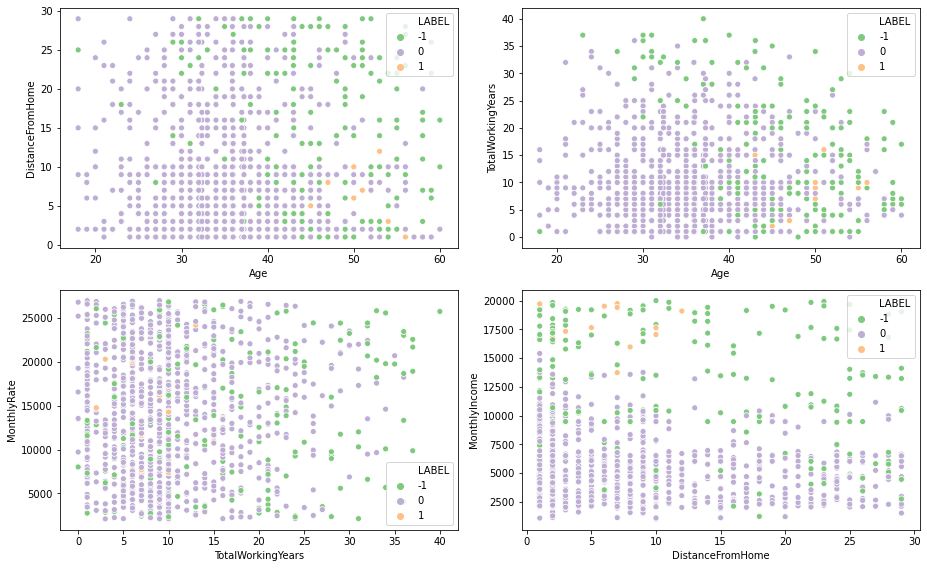

In [28]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13,8))

sns.scatterplot(x = "Age", y = "DistanceFromHome", data = dfx, hue = "LABEL", palette = "Accent", ax = ax1)
sns.scatterplot(x = "Age", y = "TotalWorkingYears", data = dfx, hue = "LABEL", palette = "Accent", ax = ax2)
sns.scatterplot(x = "TotalWorkingYears", y = "MonthlyRate", data = dfx, hue = "LABEL", palette = "Accent", ax = ax3)
sns.scatterplot(x = "DistanceFromHome", y = "MonthlyIncome", data = dfx, hue = "LABEL", palette = "Accent", ax = ax4)

plt.tight_layout()
plt.show()

/Users/francescogemignani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/francescogemignani/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


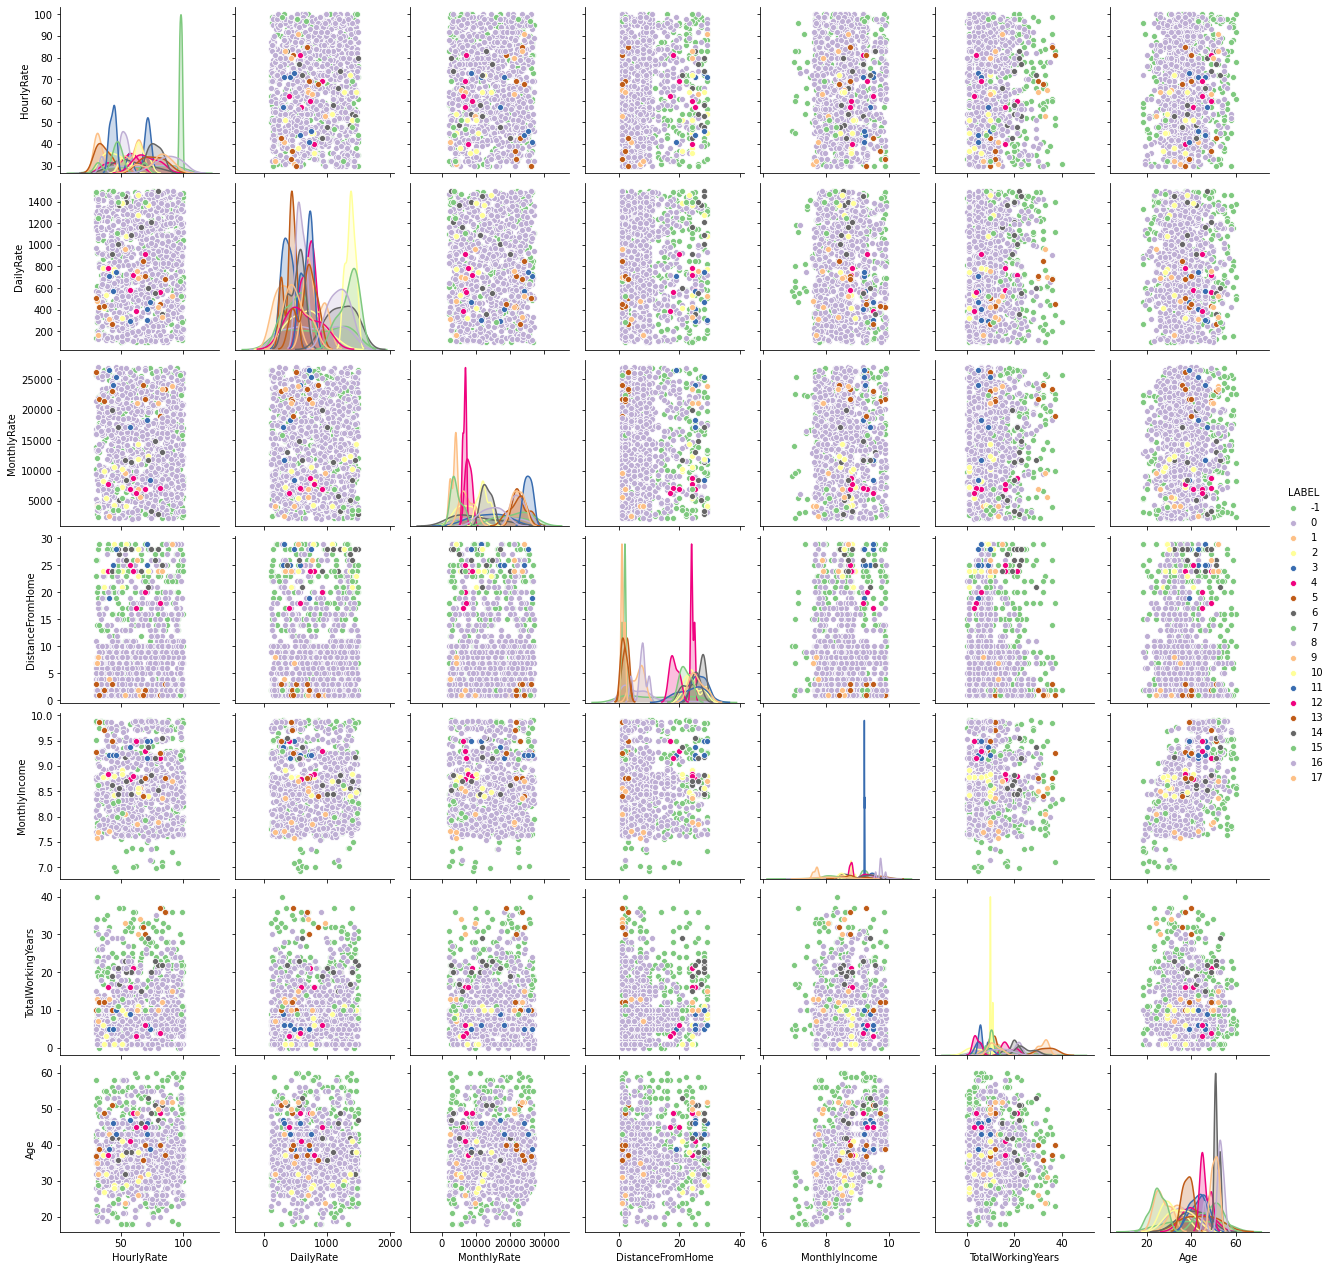

In [44]:
sns.pairplot(data = dfx, hue = "LABEL", palette = "Accent")
plt.show()

In [32]:
%matplotlib inline

from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt

df = pd.read_csv("./Dataset/attrition.csv")

In [33]:
to_push = ['Age', 'DistanceFromHome','Education','EnvironmentSatisfaction',
           'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome',
           'NumCompaniesWorked','RelationshipSatisfaction','TotalWorkingYears',
           'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole',
           'YearsSinceLastPromotion','YearsWithCurrManager'] 

to_push_2 = ['Age', 'DistanceFromHome','Education','JobLevel','MonthlyIncome',
             'NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
             'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'] 

to_push_3 = ['Age', 'DistanceFromHome','Education','JobLevel','MonthlyIncome',
             'NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
             'YearsMean'] 

to_push_4 = ['Age', 'DistanceFromHome','MonthlyIncome','NumCompaniesWorked',
             'TotalWorkingYears','YearsAtCompany'] 

to_push_5 = ['Age', 'DistanceFromHome','Education','JobLevel',
             'NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
             'YearsMean'] 


dfx=df[to_push_3]
X = StandardScaler().fit_transform(dfx.values)

In [34]:
#Compute DBSCAN

m=4
for k in np.arange(1.6,3,0.01):
    db = DBSCAN(eps=k, min_samples=m).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print(f"Eps:{k} MinSamples:{m}")
    print('Estimated number of clusters: %d' % n_clusters_)
    print('Estimated number of noise points: %d' % n_noise_)
    print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(X, labels))
    print(np.unique(db.labels_,return_counts=True))
    print("\n")


Eps:1.6 MinSamples:4
Estimated number of clusters: 4
Estimated number of noise points: 286
Silhouette Coefficient: -0.045
(array([-1,  0,  1,  2,  3]), array([286, 877,   3,   6,   4]))


Eps:1.61 MinSamples:4
Estimated number of clusters: 2
Estimated number of noise points: 280
Silhouette Coefficient: 0.101
(array([-1,  0,  1]), array([280, 892,   4]))


Eps:1.62 MinSamples:4
Estimated number of clusters: 2
Estimated number of noise points: 275
Silhouette Coefficient: 0.102
(array([-1,  0,  1]), array([275, 897,   4]))


Eps:1.6300000000000001 MinSamples:4
Estimated number of clusters: 2
Estimated number of noise points: 272
Silhouette Coefficient: 0.102
(array([-1,  0,  1]), array([272, 900,   4]))


Eps:1.6400000000000001 MinSamples:4
Estimated number of clusters: 3
Estimated number of noise points: 263
Silhouette Coefficient: 0.013
(array([-1,  0,  1,  2]), array([263, 905,   4,   4]))


Eps:1.6500000000000001 MinSamples:4
Estimated number of clusters: 4
Estimated number of noise p

Eps:2.0200000000000005 MinSamples:4
Estimated number of clusters: 3
Estimated number of noise points: 73
Silhouette Coefficient: 0.135
(array([-1,  0,  1,  2]), array([  73, 1095,    4,    4]))


Eps:2.0300000000000002 MinSamples:4
Estimated number of clusters: 3
Estimated number of noise points: 70
Silhouette Coefficient: 0.134
(array([-1,  0,  1,  2]), array([  70, 1098,    4,    4]))


Eps:2.0400000000000005 MinSamples:4
Estimated number of clusters: 3
Estimated number of noise points: 67
Silhouette Coefficient: 0.134
(array([-1,  0,  1,  2]), array([  67, 1101,    4,    4]))


Eps:2.0500000000000007 MinSamples:4
Estimated number of clusters: 3
Estimated number of noise points: 66
Silhouette Coefficient: 0.134
(array([-1,  0,  1,  2]), array([  66, 1102,    4,    4]))


Eps:2.0600000000000005 MinSamples:4
Estimated number of clusters: 3
Estimated number of noise points: 63
Silhouette Coefficient: 0.134
(array([-1,  0,  1,  2]), array([  63, 1105,    4,    4]))


Eps:2.07000000000000

Eps:2.500000000000001 MinSamples:4
Estimated number of clusters: 1
Estimated number of noise points: 6
Silhouette Coefficient: 0.345
(array([-1,  0]), array([   6, 1170]))


Eps:2.5100000000000007 MinSamples:4
Estimated number of clusters: 1
Estimated number of noise points: 6
Silhouette Coefficient: 0.345
(array([-1,  0]), array([   6, 1170]))


Eps:2.520000000000001 MinSamples:4
Estimated number of clusters: 1
Estimated number of noise points: 6
Silhouette Coefficient: 0.345
(array([-1,  0]), array([   6, 1170]))


Eps:2.530000000000001 MinSamples:4
Estimated number of clusters: 1
Estimated number of noise points: 6
Silhouette Coefficient: 0.345
(array([-1,  0]), array([   6, 1170]))


Eps:2.540000000000001 MinSamples:4
Estimated number of clusters: 1
Estimated number of noise points: 6
Silhouette Coefficient: 0.345
(array([-1,  0]), array([   6, 1170]))


Eps:2.5500000000000007 MinSamples:4
Estimated number of clusters: 1
Estimated number of noise points: 6
Silhouette Coefficient: 0

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

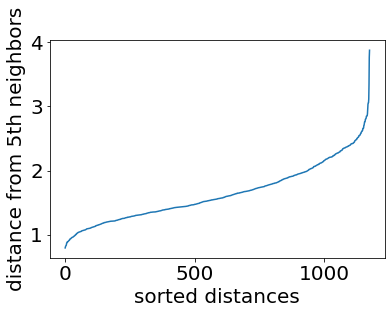

In [35]:
from scipy.spatial.distance import pdist, squareform

dist = pdist(X,"euclidean")
dist = squareform(dist)

k = 5
kth_distances = []
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])
    
plt.plot( range(0,len(kth_distances)), sorted(kth_distances))
plt.ylabel('distance from 5th neighbors',fontsize=20)
plt.xlabel('sorted distances', fontsize=20)

plt.tick_params(axis='both',labelsize=20)
plt.show()

In [263]:
###DBSCAN2 metric:minkowski grado 3 ma ancora un solo cluster

%matplotlib inline

from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt

df = pd.read_csv("./Dataset/attrition.csv")

to_push = ['Age', 'DistanceFromHome','Education','EnvironmentSatisfaction',
           'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome',
           'NumCompaniesWorked','RelationshipSatisfaction','TotalWorkingYears',
           'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole',
           'YearsSinceLastPromotion','YearsWithCurrManager'] 

to_push_2 = ['Age', 'DistanceFromHome','Education','JobLevel','MonthlyIncome',
             'NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
             'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'] 

to_push_3 = ['Age', 'DistanceFromHome','Education','JobLevel','MonthlyIncome',
             'NumCompaniesWorked','TotalWorkingYears','YearsAtCompany',
             'YearsMean'] 

to_push_4 = ['Age', 'DistanceFromHome','MonthlyIncome','NumCompaniesWorked',
             'TotalWorkingYears','YearsAtCompany'] 


dfx=df[to_push_3]